1. Crear un script que cambie el color de fondo de la imagen
2. Implementar los operadores de punto y realizar un ejemplo con cada uno
*   Brillo y contraste
*   Image matting con imagen en PNG
3. Implementar operador Sobel

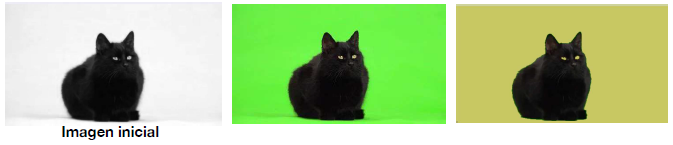

In [69]:
# Se importan las librerías necesarias
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

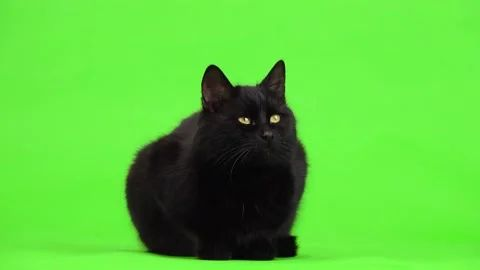

In [70]:
# Se carga la imagen
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Ejercicios/Semana03/cat.jpg')
cv2_imshow(image)

## 1. Crear un script que cambie el color de fondo de la imagen

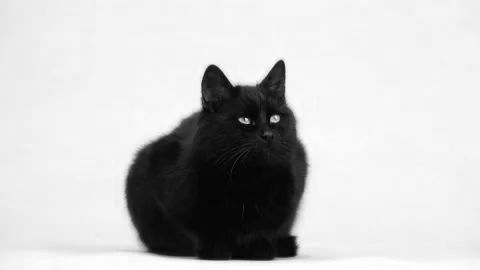

In [71]:
# El orden de los canales es BGR
green = image[:,:,1]
cv2_imshow(green)

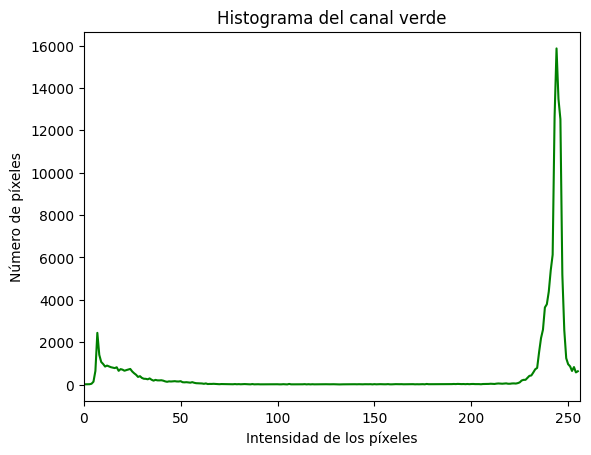

In [72]:
# Calcular el histograma para el canal verde
hist_green = cv2.calcHist([green], [0], None, [256], [0, 256])

# Mostrar el histograma usando matplotlib
plt.figure()
plt.title("Histograma del canal verde")
plt.xlabel("Intensidad de los píxeles")
plt.ylabel("Número de píxeles")
plt.plot(hist_green, color='green')  # El histograma es en verde para representar el canal
plt.xlim([0, 256])
plt.show()

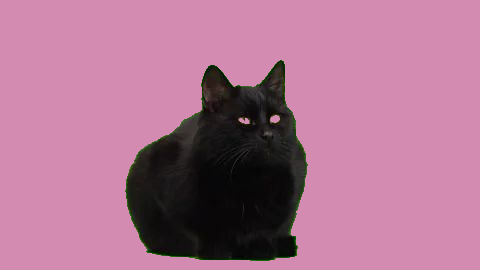

In [73]:
cambio = image.copy()
colorNuevo= (178, 139, 212)
cambio[np.where(cambio[:, :, 1] > 120)] = colorNuevo
cv2_imshow(cambio)

## 2. Implementar los operadores de punto y realizar un ejemplo con cada uno

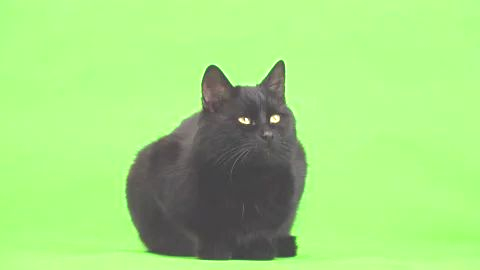

In [74]:
# Brillo y contraste
def brillo_contraste(image, brillo=0, contraste=0):
    beta = brillo
    alpha = 1 + contraste / 100.0
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

adjusted_image = brillo_contraste(image, brillo=60, contraste=15)

cv2_imshow(adjusted_image)

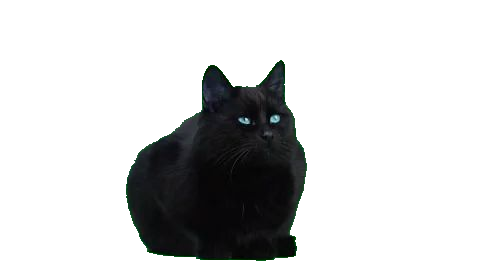

In [75]:
# Matting: Extraer el objeto (gato) de la imagen original

# Convertir a HSV para segmentación
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir un rango de color para el fondo
lower_background = np.array([35, 100, 100])
upper_background = np.array([85, 255, 255])

# Crear una máscara para el fondo
mascara = cv2.inRange(hsv, lower_background, upper_background)

# Invertir la máscara para obtener solo el gato (primer plano)
mask_inv = cv2.bitwise_not(mascara)

#Convertir la máscara invertida a 3 canales
mask_inv_3channel = cv2.merge([mask_inv, mask_inv, mask_inv])

#Aplicar la máscara para obtener solo el gato
cat = cv2.bitwise_and(image, mask_inv_3channel)

#Crear el canal alfa para la transparencia
alpha = mask_inv
cat_rgba = cv2.merge([cat[:, :, 0], cat[:, :, 1], cat[:, :, 2], alpha])

#Mostrar el gato con fondo transparente
cv2_imshow(cv2.cvtColor(cat_rgba, cv2.COLOR_BGRA2RGBA))

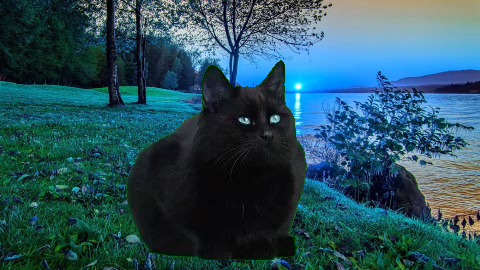

In [76]:
# Se carga la imagen de fondo
fondo = cv2.imread('/content/drive/MyDrive/ComputerVision/Ejercicios/Semana03/montaña.jpg')

# Redimensionar el fondo para que tenga las mismas dimensiones que el gato
fondo = cv2.resize(fondo, (image.shape[1], image.shape[0]))
fondo_bgra = cv2.cvtColor(fondo, cv2.COLOR_BGR2BGRA)

# Crear la máscara para el área del gato (usando el canal alfa del gato)
mask_alpha = cat_rgba[:, :, 3] / 255.0  # Se normaliza entre 0 y 1

# Superponer el gato sobre el fondo
for c in range(0, 3):
    fondo_bgra[:, :, c] = fondo_bgra[:, :, c] * (1 - mask_alpha) + cat_rgba[:, :, c] * mask_alpha

cv2_imshow(cv2.cvtColor(fondo_bgra, cv2.COLOR_BGRA2RGBA))

## 3. Implementar operador Sobel

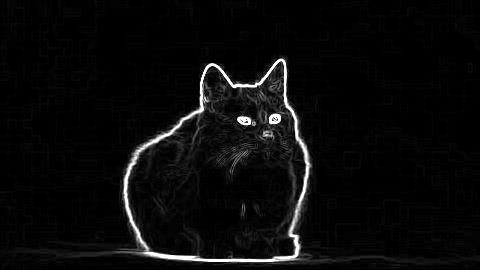

In [77]:
# Cambiar imagen a escala de grises
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar Sobel en dirección X, Y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combinar ambos gradientes
sobel_combined = cv2.magnitude(sobelx, sobely)

cv2_imshow( sobel_combined)